<a href="https://colab.research.google.com/github/hemantborse/Practical-Application-1/blob/main/prompt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import re

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [88]:
data = pd.read_csv('data/coupons.csv')

In [89]:
data.head()


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [90]:
#check if there are null entries in data
data.isnull().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


3. Decide what to do about your missing data -- drop, replace, other...

In [91]:
# Simply dropping NaN values will not help as car column is almost completely filled with NaNs, either we can drop car column or replace NaN with 0 , either action will not have any impact on dataset
data['car'] = data['car'].fillna(0)
#now we candrop Nan
data = data.dropna()
#check data again ,if everything looks good ,go to next step.
data.isnull().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


In [92]:
#check for duplicate data
print(data.duplicated().sum())
# lets ignore duplicate as only 72 entires hence no major impact

72


4. What proportion of the total observations chose to accept the coupon?



In [93]:
#get number of drivers accepted coupons
coupon_accept = data['Y'].value_counts().get(1, 0)
print(coupon_accept)
#calculate percentage and round
proportion_coupon_accept = round((coupon_accept/ len(data['Y']))*100)
print(f"proportion of the total observations chose to accept the coupon is {proportion_coupon_accept} %")

6877
proportion of the total observations chose to accept the coupon is 57 %


5. Use a bar plot to visualize the `coupon` column.

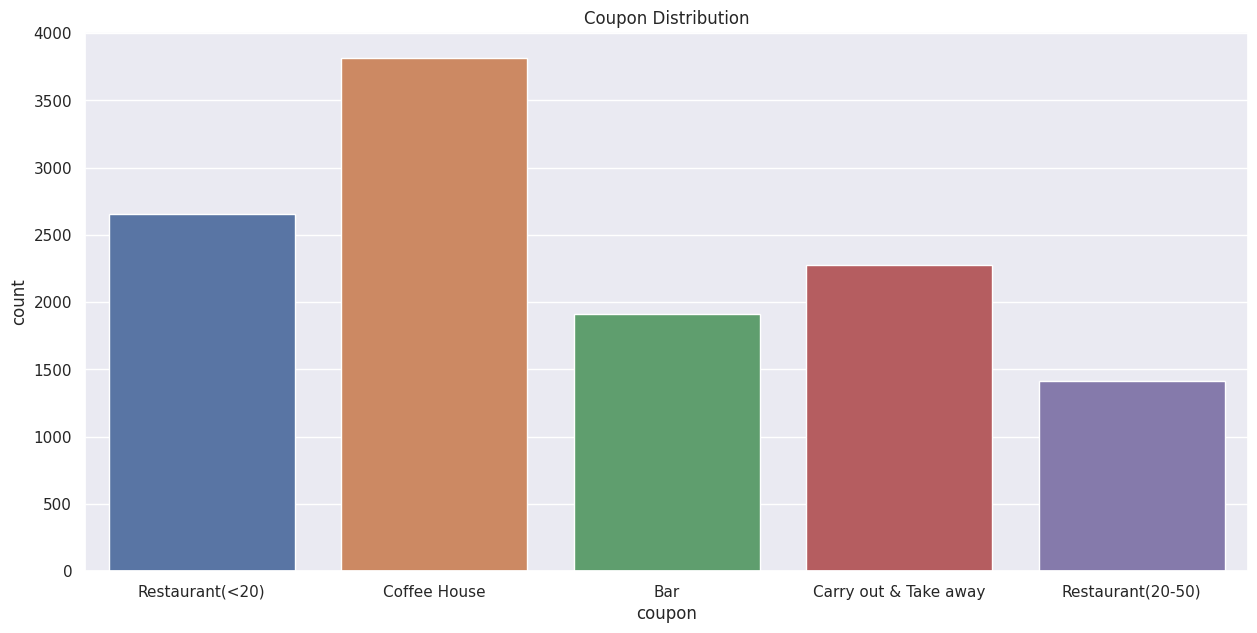

<Figure size 1500x700 with 0 Axes>

In [94]:
#set Size of plot
sns.set(rc={'figure.figsize':(15, 7)})
#use countplot to show coupoun on X axis and count on Y
ax = sns.countplot(x='coupon', data=data,hue='coupon')
ax.set_title('Coupon Distribution')
plt.show()
#save imange
plt.savefig('images/coupon.png')

6. Use a histogram to visualize the temperature column.

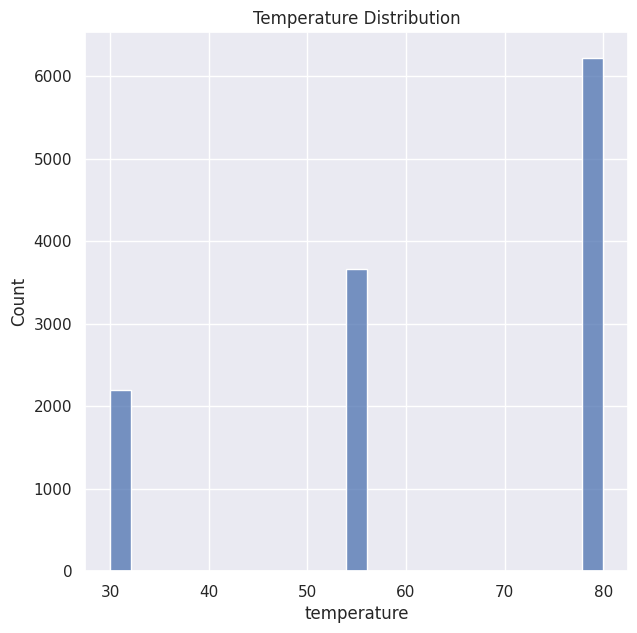

<Figure size 700x700 with 0 Axes>

In [95]:
#set the size of histogram
sns.set(rc={'figure.figsize':(7, 7)})
# use seaborn - histogram to visualize temprature column
ax = sns.histplot(data['temperature'])
ax.set_title('Temperature Distribution')
plt.show()
#save imange
plt.savefig('images/temperature.png')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [96]:
df_bar = data[data['coupon'] == 'Bar']
df_bar.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,1
46,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,0,1,0
57,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Single,...,4~8,1~3,1~3,never,1,0,0,1,0,0


2. What proportion of bar coupons were accepted?


In [97]:
bar_coupon_accept = df_bar['Y'].value_counts().get(1, 0)
print(bar_coupon_accept)
proportion_bar_coupon_accept = round((bar_coupon_accept/ len(df_bar['Y']))*100)
print(f"proportion of bar coupons were accepted is {proportion_bar_coupon_accept} %")




788
proportion of bar coupons were accepted is 41 %


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [98]:

#first lets get count of who went to a bar 3 or fewer times a month
three_or_fewer_count = ['never','less1','1~3']
filtered_df1 = df_bar[(df_bar['Bar'].isin(three_or_fewer_count))]
#filter only "Yes/True" which is 1 in Y Column
bar_coupon_accept_three_or_less  = filtered_df1['Y'].value_counts().get(1, 0)
# Calculate percentage
acceptance_Rate_three_or_less = round((bar_coupon_accept_three_or_less/ len(filtered_df1['Y']))*100)
print(f"acceptance rate of those who went to a bar 3 or fewer times a month is {acceptance_Rate_three_or_less} %")

#Now lets get count of who went to a bar more than 3 times a month
four_or_more_count = ['4~8','gt8']
filtered_df2 = df_bar[(df_bar['Bar'].isin(four_or_more_count))]
#filter only "Yes/True" which is 1 in Y Column
bar_coupon_accept_four_or_more  = filtered_df2['Y'].value_counts().get(1, 0)
# Calculate percentage
acceptance_Rate_four_or_more = round((bar_coupon_accept_four_or_more/ len(filtered_df2['Y']))*100)

print(f"acceptance rate of those who went to a bar 4 or more times a month is {acceptance_Rate_four_or_more} %")

print(f"Conclusion : acceptance rate of those who went to a bar 3 or fewer times a month is less than acceptance rate of those who went to a bar 4 or more times a month ")

acceptance rate of those who went to a bar 3 or fewer times a month is 37 %
acceptance rate of those who went to a bar 4 or more times a month is 76 %
Conclusion : acceptance rate of those who went to a bar 3 or fewer times a month is less than acceptance rate of those who went to a bar 4 or more times a month 


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [99]:

df_bar = data[data['coupon'] == 'Bar']
df_bar.head()

#first lets get count of who went to a bar more than once a month
more_than_once_a_month = ['1~3','4~8','gt8']

#df_bar['age'] = pd.to_numeric(df_bar['age'], errors='coerce')
# convert 50plus to 51 and below21 to 20 in dataset
df_bar.loc[:,'age'] = df_bar['age'].str.replace('50plus','51')
df_bar.loc[:,'age'] = df_bar['age'].str.replace('below21','20')
#Convert age column from str to int
df_bar.loc[:, 'age'] = pd.to_numeric(df_bar['age'])
#filter drivers who go to a bar more than once a month and are over the age of 25
filtered_df3 = df_bar[(df_bar['Bar'].isin(more_than_once_a_month) & (df_bar['age'] > 25))]
#filter only "Yes/True" which is 1 in Y Column
bar_coupon_accept_over_25  = filtered_df3['Y'].value_counts().get(1, 0)
# Calculate percentage
acceptance_Rate_over_25 = round((bar_coupon_accept_over_25/ len(filtered_df3['Y']))*100)
print(f"acceptance rate of those who go to a bar more than once a month and are over the age of 25 is {acceptance_Rate_over_25} %")

#first lets get count of who went to a bar fewer than once a month
fewer_than_one = ['never','less1']

#filter drivers who go to a bar fewer than once a month and are less than age of 25
filtered_df3 = df_bar[(df_bar['Bar'].isin(fewer_than_one) & (df_bar['age'] < 25))]
#filter only "Yes/True" which is 1 in Y Column
bar_coupon_accept_under_25  = filtered_df3['Y'].value_counts().get(1, 0)
# Calculate percentage
acceptance_Rate_under_25 = round((bar_coupon_accept_under_25/ len(filtered_df3['Y']))*100)
print(f"acceptance rate of those who go to a bar more than once a month and are under the age of 25 is {acceptance_Rate_under_25} %")
print(f"Conclusion : acceptance rate of those who go to a bar more than once a month and are over the age of 25 is more than acceptance rate of those who go to a bar more than once a month and are under the age of 25")

acceptance rate of those who go to a bar more than once a month and are over the age of 25 is 69 %
acceptance rate of those who go to a bar more than once a month and are under the age of 25 is 39 %
Conclusion : acceptance rate of those who go to a bar more than once a month and are over the age of 25 is more than acceptance rate of those who go to a bar more than once a month and are under the age of 25


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [100]:
more_than_once_a_month = ['1~3','4~8','gt8']
#filter drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
filtered_df4 = df_bar[(df_bar['Bar'].isin(more_than_once_a_month) & (df_bar['passanger']!='Kid(s)')) & (df_bar['occupation']!='Farming Fishing & Forestry')]
#filter only "Yes/True" which is 1 in Y Column
bar_coupon_accept = filtered_df4['Y'].value_counts().get(1, 0)
# Calculate percentage
acceptance_Rate = round((bar_coupon_accept/ len(filtered_df4['Y']))*100)
print(f"acceptance rate of those who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is {acceptance_Rate} %")

acceptance rate of those who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry is 71 %


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [101]:
more_than_once_a_month = ['1~3','4~8','gt8']
#filter drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
filtered_df5 = df_bar[(df_bar['Bar'].isin(more_than_once_a_month) & (df_bar['passanger']!='Kid(s)')) & (df_bar['maritalStatus']!='Widowed')]
#filter only "Yes/True" which is 1 in Y Column
bar_coupon_accept_not_widowed = filtered_df5['Y'].value_counts().get(1, 0)
# Calculate percentage
acceptance_rate_not_widowed =round( (bar_coupon_accept_not_widowed/ len(filtered_df5['Y']))*100)
print(f"acceptance rate of those who go to bars more than once a month and had passengers that were not a kid and were not widowed is {acceptance_rate_not_widowed} %")

acceptance rate of those who go to bars more than once a month and had passengers that were not a kid and were not widowed is 71 %


In [102]:
#first lets get count of who went to a bar more than once a month
more_than_once_a_month = ['1~3','4~8','gt8']
#filter drivers who go to a bar more than once a month and are under the age of 30
filtered_df6 = df_bar[(df_bar['Bar'].isin(more_than_once_a_month) & (df_bar['age'] < 30))]
#filter only "Yes/True" which is 1 in Y Column
bar_coupon_accept_under30  = filtered_df6['Y'].value_counts().get(1, 0)
# Calculate percentage
acceptance_rate_under_30 = round((bar_coupon_accept_under30/ len(filtered_df3['Y']))*100)
print(f"acceptance rate of those who go to a bar more than once a month and are under the age of 30 is {acceptance_rate_under_30} %")

acceptance rate of those who go to a bar more than once a month and are under the age of 30 is 76 %


In [103]:
#create copy of df_bar
df_bar_copy = df_bar.copy()
# Function to extract min and max values from the string
def extract_income_range(income_str):
    if isinstance(income_str, str): # Ensure it's a string to avoid errors
        # Remove '$' and ',' from the string
        cleaned_str = income_str.replace('$', '').replace(',', '')

        # Regex to find numbers
        numbers = re.findall(r'\d+', cleaned_str)

        if len(numbers) == 2: # Format: num - num
            return pd.Series([int(numbers[0]), int(numbers[1])])
        elif 'Less than' in cleaned_str: # Format: Less than num
            return pd.Series([0, int(numbers[0])])
        elif 'Over' in cleaned_str: # Format: Over num
            return pd.Series([int(numbers[0]), float('inf')]) # Use infinity for upper bound
        else:
            return pd.Series([pd.NA, pd.NA]) # For 'N/A' or other non-standard formats
    return pd.Series([pd.NA, pd.NA])
    # Apply the function to create new columns for min and max income
df_bar_copy[['Min_Income', 'Max_Income']] = df_bar_copy['income'].apply(extract_income_range)
#convert income colums to int
df_bar_copy.loc[:, 'Min_Income'] = pd.to_numeric(df_bar_copy['Min_Income'])
df_bar_copy.loc[:, 'Max_Income'] = pd.to_numeric(df_bar_copy['Max_Income'])

#we only need cheap restaurants more than 4 times a month
restaurant_count = ['4~8','gt8']
filtered_df7 = df_bar_copy[(df_bar_copy['RestaurantLessThan20'].isin(restaurant_count) & (df_bar_copy['Max_Income'] < 50000))]
#filter only "Yes/True" which is 1 in Y Column
bar_coupon_accept_morethan_4times  = filtered_df7['Y'].value_counts().get(1, 0)
# Calculate percentage
acceptance_rate_morethan_4times =round((bar_coupon_accept_morethan_4times/ len(filtered_df7['Y']))*100)
print(f"acceptance rate of those who go to cheap restaurants more than 4 times a month and income is less than 50K is {acceptance_rate_morethan_4times} %")

acceptance rate of those who go to cheap restaurants more than 4 times a month and income is less than 50K is 46 %


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [104]:
print('Frequency of bar Visit : Drives who go more than once to bar largely accpeted bar coupons')
print('Passenger impact : it is clear that Adult passengers with no kids as passengers also largely accepted coupons')
print('Passenger occupations : frequency to visit morethan ones with no kids as passenger plus occupations other than farming, fishing, or forestry largely accpeted coupons')
print('income impact and restaurant spending : drivers going to cheap restaurants and income less than 50K are on on lower side of acceptance of coupons')

Frequency of bar Visit : Drives who go more than once to bar largely accpeted bar coupons
Passenger impact : it is clear that Adult passengers with no kids as passengers also largely accepted coupons
Passenger occupations : frequency to visit morethan ones with no kids as passenger plus occupations other than farming, fishing, or forestry largely accpeted coupons
income impact and restaurant spending : drivers going to cheap restaurants and income less than 50K are on on lower side of acceptance of coupons


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [105]:
#work on coffeehouse groups
df_coffee = data[data['coupon'] == 'Coffee House']
df_coffee.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0
27,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
28,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
30,No Urgent Place,Friend(s),Sunny,80,6PM,Coffee House,2h,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,0


In [106]:
coffee_coupon_accept = df_coffee['Y'].value_counts().get(1, 0)
print(coffee_coupon_accept)
proportion_coffee_coupon_accept =round((coffee_coupon_accept/ len(df_coffee['Y']))*100)
print(f"proportion of coffee coupons were accepted is {proportion_coffee_coupon_accept} %")


1894
proportion of coffee coupons were accepted is 50 %


In [107]:
df_coffee = data[data['coupon'] == 'Coffee House']
df_coffee.head()
# convert 50plus to 51 and below21 to 20 in dataset
df_coffee.loc[:,'age'] = df_coffee['age'].str.replace('50plus','51')
df_coffee.loc[:,'age'] = df_coffee['age'].str.replace('below21','20')
#Convert age column from str to int
df_coffee.loc[:, 'age'] = pd.to_numeric(df_coffee['age'])
#filter drivers who go to a coffee hous more than once a month and are over the age of 25
more_than_once_a_month = ['1~3','4~8','gt8']
filtered_cdf = df_coffee[(df_coffee['CoffeeHouse'].isin(more_than_once_a_month) & (df_coffee['age'] > 25))]

#filter only "Yes/True" which is 1 in Y Column
coffee_coupon_accept_over_25  = filtered_cdf['Y'].value_counts().get(1, 0)
# Calculate percentage
acceptance_Rate_over_25 = round((coffee_coupon_accept_over_25/ len(filtered_cdf['Y']))*100)
print(f"acceptance rate of those who go to a Coffee House more than once a month and are over the age of 25 is {acceptance_Rate_over_25} %")

acceptance rate of those who go to a Coffee House more than once a month and are over the age of 25 is 64 %


In [108]:

filtered_cdf1 = df_coffee[(df_coffee['temperature']<80)]

#filter only "Yes/True" which is 1 in Y Column
coffee_coupon_accept_temp_less80  = filtered_cdf1['Y'].value_counts().get(1, 0)
# Calculate percentage
acceptance_Rate_temp = round((coffee_coupon_accept_temp_less80/ len(filtered_cdf1['Y']))*100)
print(f"acceptance rate of those who go to a Coffee House while temparature is less than 80 is {acceptance_Rate_temp} %")

acceptance rate of those who go to a Coffee House while temparature is less than 80 is 45 %


In [109]:
print('Observations : ')
print('overall coffee hous coupon acceptace is half and half i.e 50%')
print('Frequency of visits : Drivers who visited coffee house more than once has higher rate of coupoun acceptance')
print('Temprature impact : looking at percentage , tempratures do not make that big of a difference in acceptance rate')


Observations : 
overall coffee hous coupon acceptace is half and half i.e 50%
Frequency of visits : Drivers who visited coffee house more than once has higher rate of coupoun acceptance
Temprature impact : looking at percentage , tempratures do not make that big of a difference in acceptance rate
